## IMPORT LIBRARIES

In [1]:
# Import libraries
from utils import folders_tb as ft
from utils import mining_data_tb as mdt
from utils import visualization_tb as vis
from utils import apis_tb as ap


# Create objects
variable_creator = ft.Folders()
variable_miner = mdt.Miner()
variable_visual = vis.Visualization()
variable_apis = ap.Apis()

# Constants for the API call
passwords = {"group_id":"E80"}
# url_b = "http://81.40.88.247:5001/" # Javi Olcoz
url_b = "http://192.168.0.21:5000/" # Alex B
# url_b = "http://37.14.156.84:5001/" # Antonio
url_add = {"group_id": "group_id?password=" , "token": "token_id?password="}

## READ DATA

In [2]:
# Assign the df to a first variable called first_visualitation
first_visualitation_raw = variable_creator.open_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# Data of recovered
recovered = variable_creator.open_csv("https://covid19tracking.narrativa.com/csv/recovered.csv") 

# Trying to obtain the data from the server, in case it fails, returns the last version of the doc stored
d_json = variable_apis.requester(url_b,url_add,passwords) 

error in the response, proceed to open the newest copy of the file given


## CLEAN DATA

In [3]:
# Merge the dataframes of 'first_visualitation' and 'recovered'in 'first_visualitation'
first_visualitation = variable_miner.sort_and_merge_recovered(first_visualitation_raw,recovered) 

# Clean the dataframe in order to have just the asked countries
df_required_countries = variable_miner.chosen_countries(first_visualitation,'location', 'Poland', 'South Africa', 'Ukraine', 'Indonesia', 'Spain')

# Creation of the json file for the server 
variable_miner.json_creator(df_required_countries) 

# Turn the date column (string) into datetime.
df_required_countries = variable_miner.column_to_datetime(df_required_countries, 'date')

# Pivot table with date and countries as index (evolution per date)
# date_location_pivot_table = variable_miner.pivot_table_date_location(df_required_countries,'date', 'location')

# Better visualitation of the dataframe having the countries as index
df_required_countries = variable_miner.set_index_1(df_required_countries, 'location')

In [4]:
# df droping the constant values columns 
df_no_constant_1 = variable_miner.no_constant_df(df_required_countries,'Poland','South Africa','Indonesia','Ukraine','Spain')
df_no_constant = variable_miner.set_index_1(df_no_constant_1, 'location')

# df droping "... per..." columns
df_no_per = variable_miner.drop_per_columns(df_required_countries)

# df droping the constant values columns and "... per..." columns
df_no_constant_no_per_1 = variable_miner.no_constant_df(df_no_per,'Poland','South Africa','Indonesia','Ukraine','Spain')
df_no_constant_no_per = variable_miner.set_index_1(df_no_constant_no_per_1, 'location')

In [5]:
# masking dfs

# all columns masked
df_required_countries_masked = variable_miner.neg_to_nan_complete(df_required_countries)

# no constants masked
df_no_constant_masked = variable_miner.neg_to_nan_complete(df_no_constant)

# no "per" masked
df_no_per_masked = variable_miner.neg_to_nan_complete(df_no_per)

# no constants, no "per", masked
df_no_constant_no_per_masked = variable_miner.neg_to_nan_complete(df_no_constant_no_per)

In [6]:
### poland dfs:
# df poland, masked
df_poland_masked = variable_miner.by_country(df_required_countries_masked, 'Poland')

#df poland, masked, no "per"
df_poland_masked_no_per = variable_miner.drop_per_columns(df_poland_masked)

### South Africa dfs:
# df south africa, masked
df_south_africa_masked = variable_miner.by_country(df_required_countries_masked, 'South Africa')

#df South Africa, masked, no "per"
df_south_africa_masked_no_per = variable_miner.drop_per_columns(df_south_africa_masked)

### indonesia dfs:
# df indonesia, masked
df_indonesia_masked = variable_miner.by_country(df_required_countries_masked, 'Indonesia')

#df indonesia, masked, no "per"
df_indonesia_masked_no_per = variable_miner.drop_per_columns(df_indonesia_masked)

### ukraine dfs:
# df ukraine, masked
df_ukraine_masked = variable_miner.by_country(df_required_countries_masked, 'Ukraine')

#df ukraine, masked, no "per"
df_ukraine_masked_no_per = variable_miner.drop_per_columns(df_ukraine_masked)

### spain dfs:
# df spain, masked
df_spain_masked = variable_miner.by_country(df_required_countries_masked, 'Spain')

#df spain, masked, no "per"
df_spain_masked_no_per = variable_miner.drop_per_columns(df_spain_masked)

#dataframe for pies
df_pie = variable_miner.get_dataframe_pies(df_required_countries)

## DATA ANALYSIS

In [7]:
# Function that calculates the correlation matrix for all of the assigned variables

highest_poland_correlation, highest_south_africa_correlation, highest_indonesia_correlation, highest_ukraine_correlation, highest_spain_correlation, top_10_highest_poland_correlation, top_10_highest_south_africa_correlation, top_10_highest_indonesia_correlation, top_10_highest_ukraine_correlation, top_10_highest_spain_correlation = variable_miner.matrix_high_correlation(dataset1=df_poland_masked_no_per, dataset2= df_south_africa_masked_no_per, dataset3= df_indonesia_masked_no_per, dataset4=df_ukraine_masked_no_per, dataset5=df_spain_masked_no_per)

## DATA PLOTS

In [11]:
# Tendency plots
y = ["total_cases", "total_deaths", "new_cases_smoothed", "new_deaths_smoothed"]
ylabel = ["Total cases(L)", "Total deaths(R)", "New cases(R)", "New deaths(R)"]
yaxis = [False, True, True, True]

variable_visual.tendency_plots_wrapper(df_required_countries_masked, y, ylabel, yaxis)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Alex/Documents/The_Bridge-Data_Science/Codigos_python/Python_code_own/Covid_Group_Project_E/plots/html/lockdownsPoland.html'

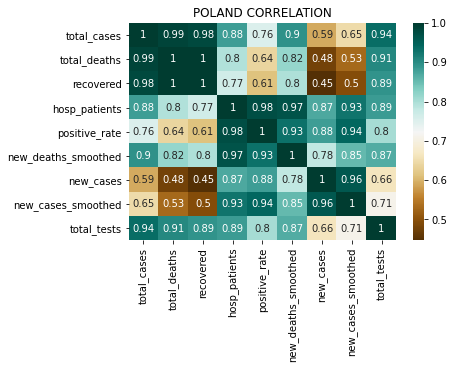

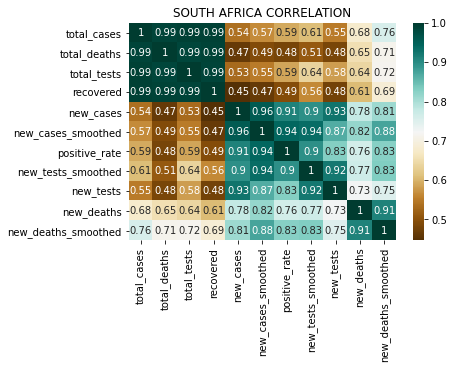

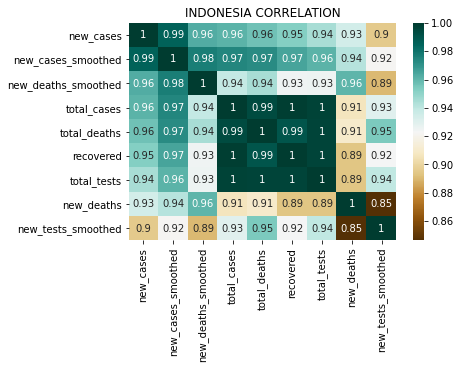

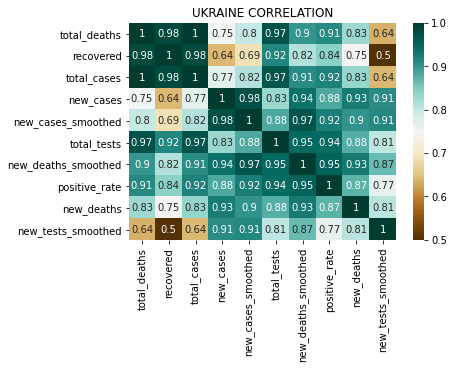

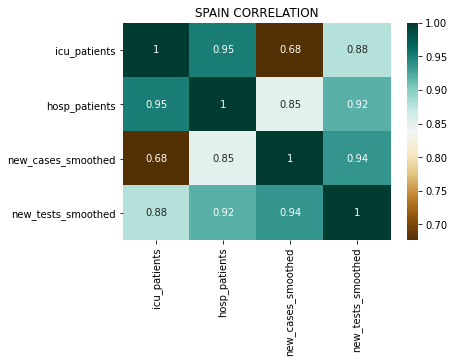

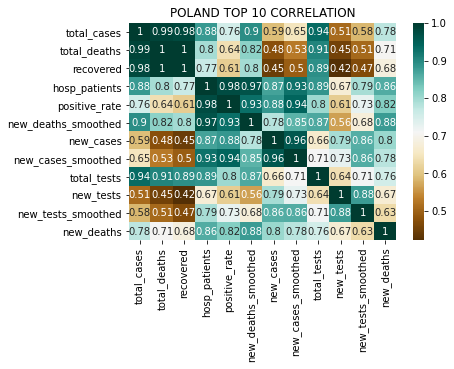

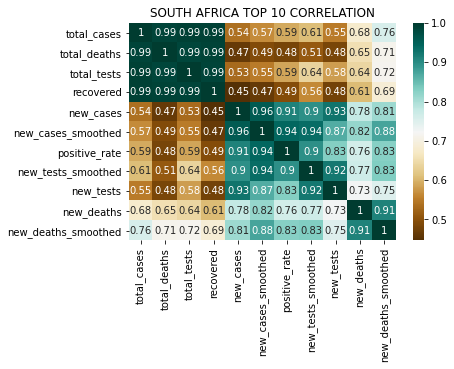

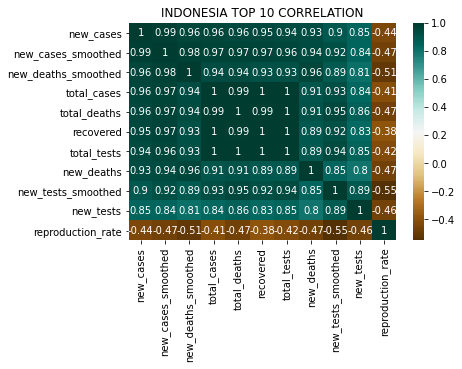

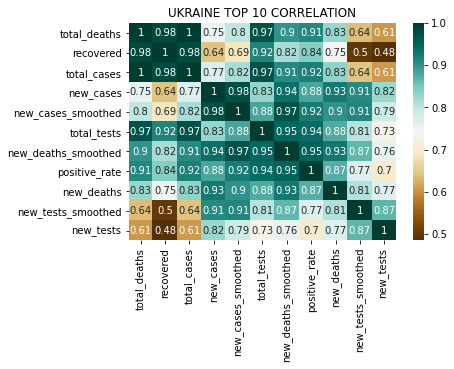

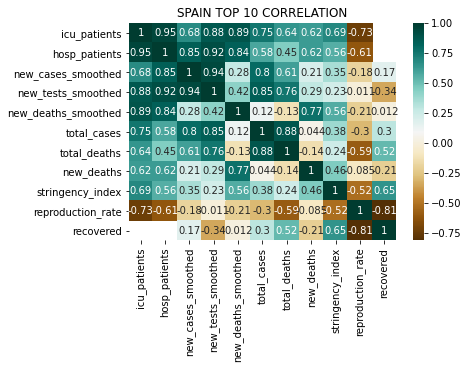

In [9]:
# Visualization of all matrix
poland_matrix, south_africa_matrix, indonesia_matrix, ukraine_matrix, spain_matrix, top_poland_matrix, top_south_africa_matrix, top_indonesia_matrix, top_ukraine_matrix, top_spain_matrix = variable_visual.all_matrix_visualization(highest_poland_correlation, highest_south_africa_correlation, highest_indonesia_correlation, highest_ukraine_correlation, highest_spain_correlation, top_10_highest_poland_correlation, top_10_highest_south_africa_correlation, top_10_highest_indonesia_correlation, top_10_highest_ukraine_correlation, top_10_highest_spain_correlation)

In [10]:
# Pie charts for new_cases and new deaths
colors = ["#ff9633", "#8df877", "#52c8e8", "#6a5ef1", "#fa3939"]
variable_visual.make_pies(df_pie, "Country", "Country", "AV_NewDeaths", "AV_NewCases", colors, "Average daily deaths", "Average daily cases")

In [11]:
# Scatter, Line and bar plots for new_cases and new deaths (by country)
variable_visual.variety_plot_wrapper(df_required_countries_masked)

In [12]:
# New deaths plot
import datetime as dt
lines = [[dt.datetime(2020, 3, 27), dt.datetime(2020, 4, 30), dt.datetime(2020, 9, 27), dt.datetime(2020, 11, 25), dt.datetime(2020, 12, 28)], \
         [dt.datetime(2020, 5, 18), dt.datetime(2020, 8, 10), dt.datetime(2020, 12, 2)], \
         [dt.datetime(2020, 4, 1), dt.datetime(2020, 12, 12), dt.datetime(2021, 1, 14)], \
         [dt.datetime(2020, 3, 17), dt.datetime(2020, 9, 25), dt.datetime(2020, 11, 11)], \
         [dt.datetime(2020, 3, 11), dt.datetime(2020, 4, 3), dt.datetime(2020, 8, 11), dt.datetime(2020, 11, 9), dt.datetime(2021, 1, 6)]]
variable_visual.new_deaths_plot(df_required_countries_masked, lines)

In [9]:
# representing the json file
df_json = variable_miner.json_prep_plot(d_json)

fig3 = variable_visual.make_lineplot(data=df_json, x='Date', y='Total Deaths Mean', x_label='DATE', y_label='Total Deaths Mean', title='ANNEXED GROUP JSON LINE PLOT')

fig4 = variable_visual.make_barplot(data=df_json, x='Date', y='Total Deaths Mean', x_label='DATE', y_label='Total Deaths Mean', title='ANNEXED GROUP JSON BAR PLOT')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Alex/Documents/The_Bridge-Data_Science/Codigos_python/Python_code_own/Covid_Group_Project_E/plots/static/lineplot_Total Deaths Mean_ANNEXED GROUP JSON LINE PLOT.png'